<h3><b>Аппроксимация МНК<b><h3>

<b><h5>Реализация примеров из книги Титова</h5><b>

In [66]:
import scipy.linalg
import numpy as np
from numpy import *
from scipy.optimize import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

sns.set_style('whitegrid')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

<b>3.1</b>  Методом наименьших квадратов построить аппроксимирующую параболу y^m=c0+c1x+c2x^2 для функции, заданной в табличном виде:<br>

Значения коэффициентов:
c(0)=-1.2600000
c(1)=1.4900000
c(2)=-0.1500000
Уравнение кривой Ym=-1.260000+(1.490000)*x+(-0.150000)*x^2
Сумма площадей квадратов отклонений равна 0.072000


C:\Users\user\AppData\Local\Temp\ipykernel_1244\1870393718.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Сумма площадей квадратов отклонений равна %.6f" % v)


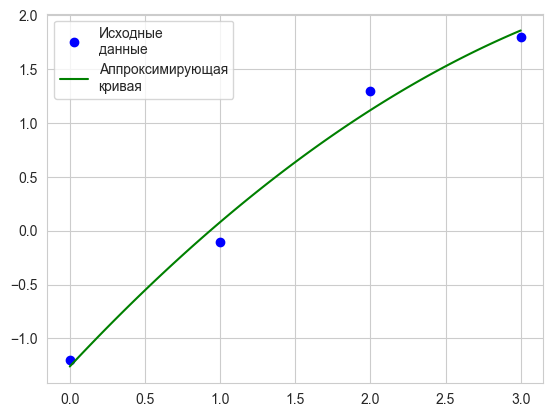

In [67]:
x = np.array([0, 1, 2, 3])
y = np.array([-1.2, -0.1, 1.3, 1.8])
A = x[:, np.newaxis] ** [0, 1, 2]
res = linalg.lstsq(A, y, rcond=None)
print("Значения коэффициентов:")
for i in range(3):
    print("c(%i)=%.7f" % (i, res[0][i]))
a, b, c = res[0][0], res[0][1], res[0][2]
print("Уравнение кривой Ym=%.6f+(%.6f)*x+(%.6f)*x^2" % (a, b, c))
v = res[1]
print("Сумма площадей квадратов отклонений равна %.6f" % v)
x1 = np.linspace(min(x), max(x), 100)
ym = a + b * x1 + c * x1 ** 2
plt.plot(x, y, 'bo', label="Исходные\nданные")
plt.plot(x1, ym, label="Аппроксимирующая\nкривая", c='g')
plt.legend()
plt.show()


<b>3.2</b> Методом наименьших квадратов определить коэффициенты аппроксимирующей кривой Y=c1x*cos(c2x)+c3 для таблично
заданной функции:

<b>Шаг 1.</b> Построить график полученной кривой, на который необходимо
нанести исходные данные. Вычислить сумму площадей квадратных отклонений.

Коэффициенты кривой:
a= 1.802327
b= 0.833727
c= 6.899874
Уравнение кривой Y=1.802327*x*cos(0.833727x)+6.899874
Сумма площадей квадратов отклонений равна 1148.003767


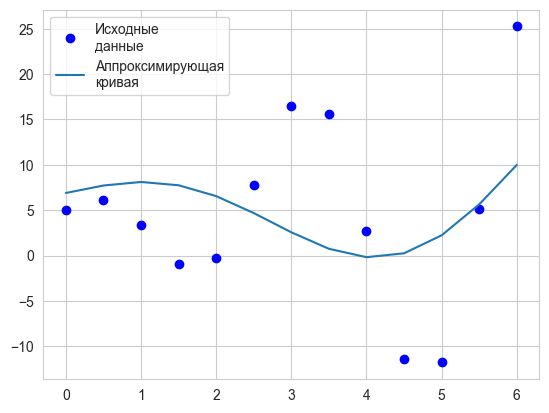

In [68]:
x=np.linspace(0,6,13)
y=np.array([5.02, 6.08, 3.33, -0.93, -0.22, 7.83, 16.52, 15.55, 2.67, -11.42, -11.78, 5.09, 25.25])
def f(x, a, b, c):
 return a*x*np.cos(b*x)+c
args,_ = curve_fit(f, x, y)
a, b, c = args[0], args[1], args[2]
print("Коэффициенты кривой:")
print("a= %.6f" % a)
print("b= %.6f" % b)
print("c= %.6f" % c)
print("Уравнение кривой Y=%.6f*x*cos(%.6fx)+%.6f" % (a,b,c))
v=np.sum((f(x, a, b, c)-y)**2)
print("Сумма площадей квадратов отклонений равна %.6f" % v)
plt.plot(x, y, 'bo', label="Исходные\nданные")
plt.plot(x, f(x, a, b, c), label="Аппроксимирующая\nкривая")
plt.legend()
plt.show()


<b>Шаг 2.</b> Увеличим и количество точек, по которым будем строить график аппроксимирующей кривой.

Коэффициенты кривой:
a= 4.000196
b= 1.999998
c= 4.999244
Уравнение кривой Y=4.000196*x*cos(1.999998x)+4.999244
Сумма площадей квадратов отклонений равна 0.001124


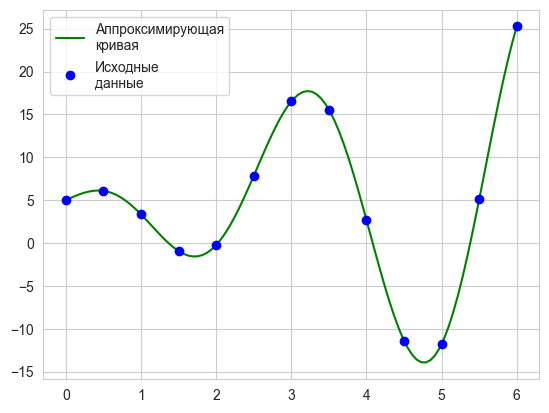

In [69]:
x=np.linspace(0,6,13)
y=np.array([5.02, 6.08, 3.33, -0.93, -0.22, 7.83, 16.52, 15.55, 2.67, -11.42, -11.78, 5.09, 25.25])
def f(x, a, b, c):
 return a*x*np.cos(b*x)+c
args,_ = curve_fit(f, x, y, [1,2,3])
a, b, c = args[0], args[1], args[2]
print("Коэффициенты кривой:")
print("a= %.6f" % a)
print("b= %.6f" % b)
print("c= %.6f" % c)
print("Уравнение кривой Y=%.6f*x*cos(%.6fx)+%.6f" % (a,b,c))
v=np.sum((f(x, a, b, c)-y)**2)
print("Сумма площадей квадратов отклонений равна %.6f" % v)
x1=np.linspace(0,6,100)
plt.plot(x1, f(x1, a, b, c),
 label="Аппроксимирующая\nкривая",c='g')
plt.plot(x, y, 'bo', label="Исходные\nданные")
plt.legend()
plt.show()


<b>Шаг 3.</b> Программа нахождения необходимых значений и построения соответствующих графиков.

Коэффициенты подобранной зависимости:
a= 4.000196
b= 1.999998
c= 4.999244
Уравнение кривой Y=4.000196*x*cos(1.999998x)+4.999244
Сумма площадей квадратов отклонений равна 0.001124


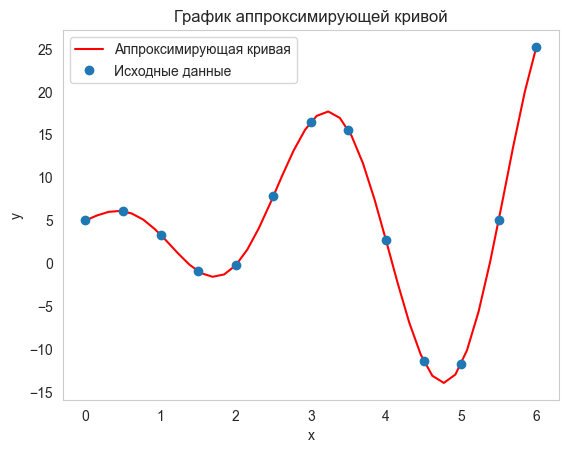

In [70]:
# задаем исходные данные x и y
x=np.linspace(0,6,13)
y=[5.02,6.08,3.33,-0.93,-0.22,7.83,16.52,15.55,
 2.67,-11.42,-11.78,5.09,25.25]
# задаем аппроксимирующую кривую как функцию
# аргумента х и трех искомых параметров a, b и c
def f(x, a, b, c):
 return a*x*np.cos(b*x)+c
def g(x0):
 return y- f(x, *x0) # определяем функцию невязок
x0_init = (1,2,3) # задаем начальное приближение
# передаем в функцию leastsq требуемые параметры
x_opt, _ = optimize.leastsq(g, x0_init)
a, b, c =x_opt[0], x_opt[1], x_opt[2]
print("Коэффициенты подобранной зависимости:")
print("a= %.6f" % a)
print("b= %.6f" % b)
print("c= %.6f" % c)
print("Уравнение кривой Y=%.6f*x*cos(%.6fx)+%.6f" % (a,b,c))
v=np.sum((f(x, a, b, c)-y)**2)
print("Сумма площадей квадратов отклонений равна %.6f" % v)
x1=np.linspace(0,6,40) # задаем пределы значений х
# для построения графика полученной кривой
w=f(x1,a,b,c) # вычисляем
# значения полученной кривой в этих точках и строим график
plt.plot(x1,w,'r')
plt.plot(x,y,'o')
plt.title("График аппроксимирующей кривой") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid() # наносим на график сетку
plt.legend(('Аппроксимирующая кривая', 'Исходные данные'))
plt.show()

<b><h5>Провести аппроксимацию МНК многочленами 1, 2 степени. Определить степень аппроксимации и построить соотвествующие графики</h5></b>
Вариант №2
<table>
  <tr>
    <td>x</td><td>0,1</td><td>0,2</td><td>0,3</td><td>0,4</td><td>0,5</td><td>0,6</td><td>0,7</td><td>0,8</td>
  </tr>
  <tr>
    <td>y</td><td>3,314</td><td>3,278</td><td>3,262</td><td>3,292</td><td>3,332</td><td>3,397</td><td>3,487</td><td>3,563</td>
  </tr>
</table>

Коэффициенты для многочлена первой степени:
c(0)=3.1924286
c(1)=0.3848810
Уравнение кривой Ym=3.192429+(0.384881)*x
Сумма квадратов отклонений равна 0.020090

Коэффициенты для многочлена второй степени:
c(0)=3.3537679
c(1)=-0.5831548
c(2)=1.0755952
Уравнение кривой Ym=3.353768+(-0.583155)*x+(1.075595)*x^2
Сумма квадратов отклонений равна 0.000654


C:\Users\user\AppData\Local\Temp\ipykernel_1244\916340095.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res1 = linalg.lstsq(A1, y)
C:\Users\user\AppData\Local\Temp\ipykernel_1244\916340095.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Сумма квадратов отклонений равна %.6f" % sum_of_squares1)
C:\Users\user\AppData\Local\Temp\ipykernel_1244\916340095.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advis

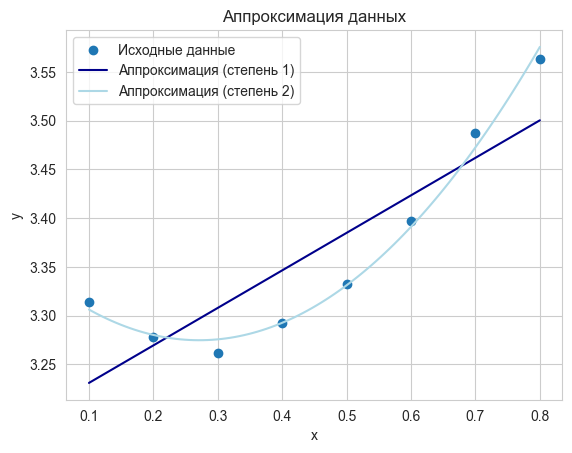

In [77]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
y = np.array([3.314, 3.278, 3.262, 3.292, 3.332, 3.397, 3.487, 3.563])

A1 = np.vstack([np.ones_like(x), x]).T
res1 = linalg.lstsq(A1, y)
coefficients1 = res1[0]
a1, b1 = coefficients1[0], coefficients1[1]
print("Коэффициенты для многочлена первой степени:")
for i in range(2):
    print("c(%i)=%.7f" % (i, coefficients1[i]))
print("Уравнение кривой Ym=%.6f+(%.6f)*x" % (a1, b1))
sum_of_squares1 = res1[1]
print("Сумма квадратов отклонений равна %.6f" % sum_of_squares1)

A2 = np.vstack([np.ones_like(x), x, x**2]).T
res2 = linalg.lstsq(A2, y)
coefficients2 = res2[0]
a2, b2, c2 = coefficients2[0], coefficients2[1], coefficients2[2]
print("\nКоэффициенты для многочлена второй степени:")
for i in range(3):
    print("c(%i)=%.7f" % (i, coefficients2[i]))
print("Уравнение кривой Ym=%.6f+(%.6f)*x+(%.6f)*x^2" % (a2, b2, c2))
sum = res2[1]
print("Сумма квадратов отклонений равна %.6f" % sum)

x_vals = np.linspace(min(x), max(x), 100)
y_vals1 = a1 + b1 * x_vals
y_vals2 = a2 + b2 * x_vals + c2 * x_vals**2
plt.scatter(x, y, label="Исходные данные")
sns.lineplot(x=x_vals, y=y_vals1, label="Аппроксимация (степень 1)", color='darkblue')
sns.lineplot(x=x_vals, y=y_vals2, label="Аппроксимация (степень 2)", color='lightblue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация данных')
plt.show()